In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import networkx as nx
import music21 as msc
from funciones import *

env = msc.environment.UserSettings()
#env['musicxmlPath'] = r'C:\Program Files (x86)\Finale NotePad 2012\Finale NotePad.exe' #Path a la aplicacion Finale
#env['musicxmlPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'          #Path a la aplicacion MuseScore 
#env['musicxmlPath']='/usr/bin/mscore'
msc.environment.set('musescoreDirectPNGPath', 'C:\\Program Files (x86)\\MuseScore 2\\bin\\MuseScore.exe')
msc.environment.set('musicxmlPath', 'C:\\Program Files (x86)\\MuseScore 2\\bin\\MuseScore.exe')


In [ ]:
#---------------------------------------------------------------------
#Funciones:

#f_xml2graph(cancion, nombre_parte=None, modelo='melodia') modelo tambien puede ser 'ritmo'
#graficar (G, color_map='rainbow', layout='espiral') el layout puede ser 'circular' tambien
#f_motifs_rhytmic(cancion,length,nombre_parte=None)
#f_grado_dist_M(G)
#f_grado_dist_H(G)
#f_tabla(G,'artista')

#---------------------------------------------------------------------
#Cancion que se van a usar:

#G=f_xml2graph(r'.\\partituras\\Mozart__Rondo_Ala_Turca.mxl')
#G=f_xml2graph(r'.\\partituras\\Chopin_-_Nocturne_Op_9_No_2_E_Flat_Major.mxl')
#G=f_xml2graph(r'.\\partituras\\Bach_Toccata_and_Fugue_in_D_Minor_Piano_solo.mxl')
#G=f_xml2graph(r'.\\partituras\\bachcelloprelude.mxl')
#G=f_xml2graph(r'.\\partituras\\queen_underpressure.mxl', 'Bass Guitar')

#--------------------------------------------------
#Para seleccionar alguna voz en particular de la cancion:

#song = msc.converter.parse(r'.\\partituras\\13725_ice_ice_baby.mxl') # Lee la cancion, queda un elemento stream.Score

#Lp = len(song.parts) # Cantidad de partes (voces)
#lista_partes = list(np.zeros(Lp)) # Crea una lista donde se van a guardas los nombres de las partes

#for i,elem in enumerate(song.parts):
#        lista_partes[i] = elem.partName

                
#G=f_xml2graph(r'.\\partituras\\13725_ice_ice_baby.mxl', lista_partes[1])

In [2]:
#---------------------------------------------------------------------
#Tomamos esas obras y vamos a ver solamente sus primeras voces
#Lo hacemos para la parte melódica y rítmica

grafos_m = []
grafos_r = []
archivos = ['Mozart__Rondo_Ala_Turca', 'Chopin_-_Nocturne_Op_9_No_2_E_Flat_Major', 'Bach_Toccata_and_Fugue_in_D_Minor_Piano_solo',
           'bachcelloprelude', 'queen_underpressure']

for j,arc in enumerate(archivos):
    grafos_m .append(f_xml2graph(r'.\\partituras\\'+arc+'.mxl',modelo='melodia'))
    grafos_r.append(f_xml2graph(r'.\\partituras\\'+arc+'.mxl',modelo='ritmo'))
    
#definimos una capeta personal para guardar la información
outfolder ='C:/Users/Lucio/Desktop/FACULTAD/Redes/datos/datosTPE/'

Parte seleccionada: Piano
Parte seleccionada: Piano
Parte seleccionada: Piano
Parte seleccionada: Piano
Parte seleccionada: Piano
Parte seleccionada: Piano
Parte seleccionada: Violonchelo, Solo Cello
Parte seleccionada: Violonchelo, Solo Cello
Parte seleccionada: Clean Guitar 1
Parte seleccionada: Clean Guitar 1


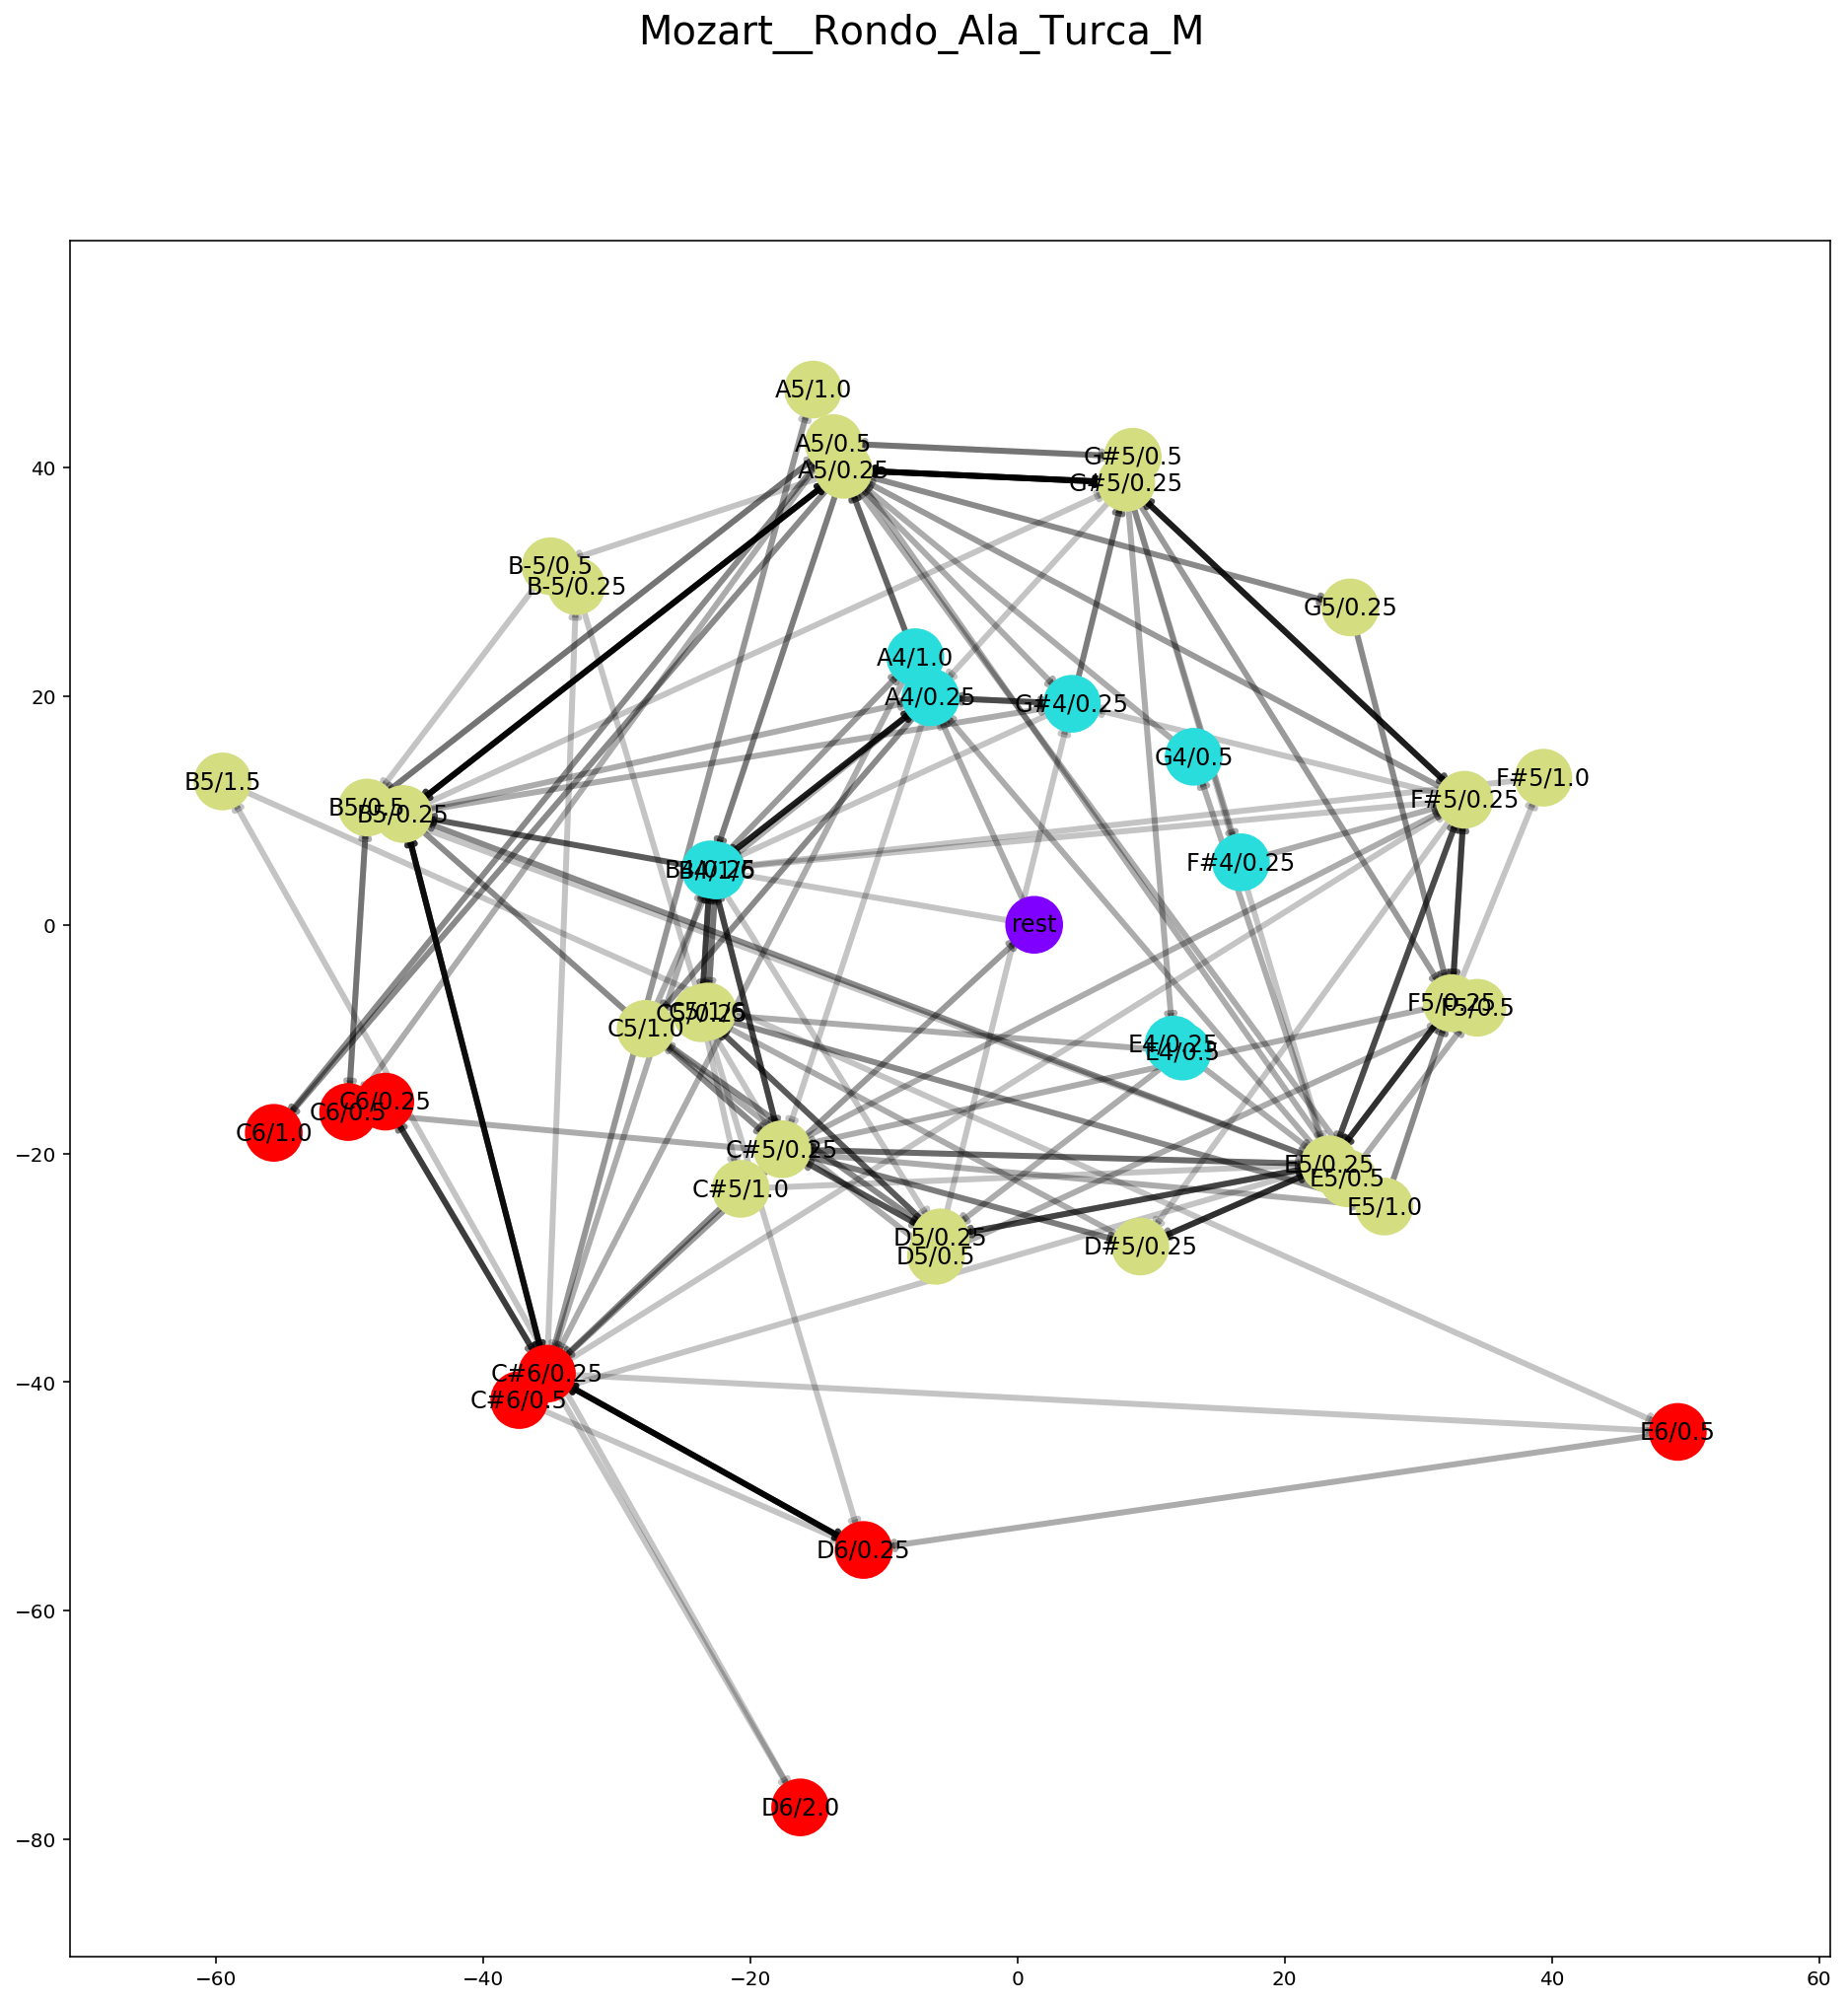

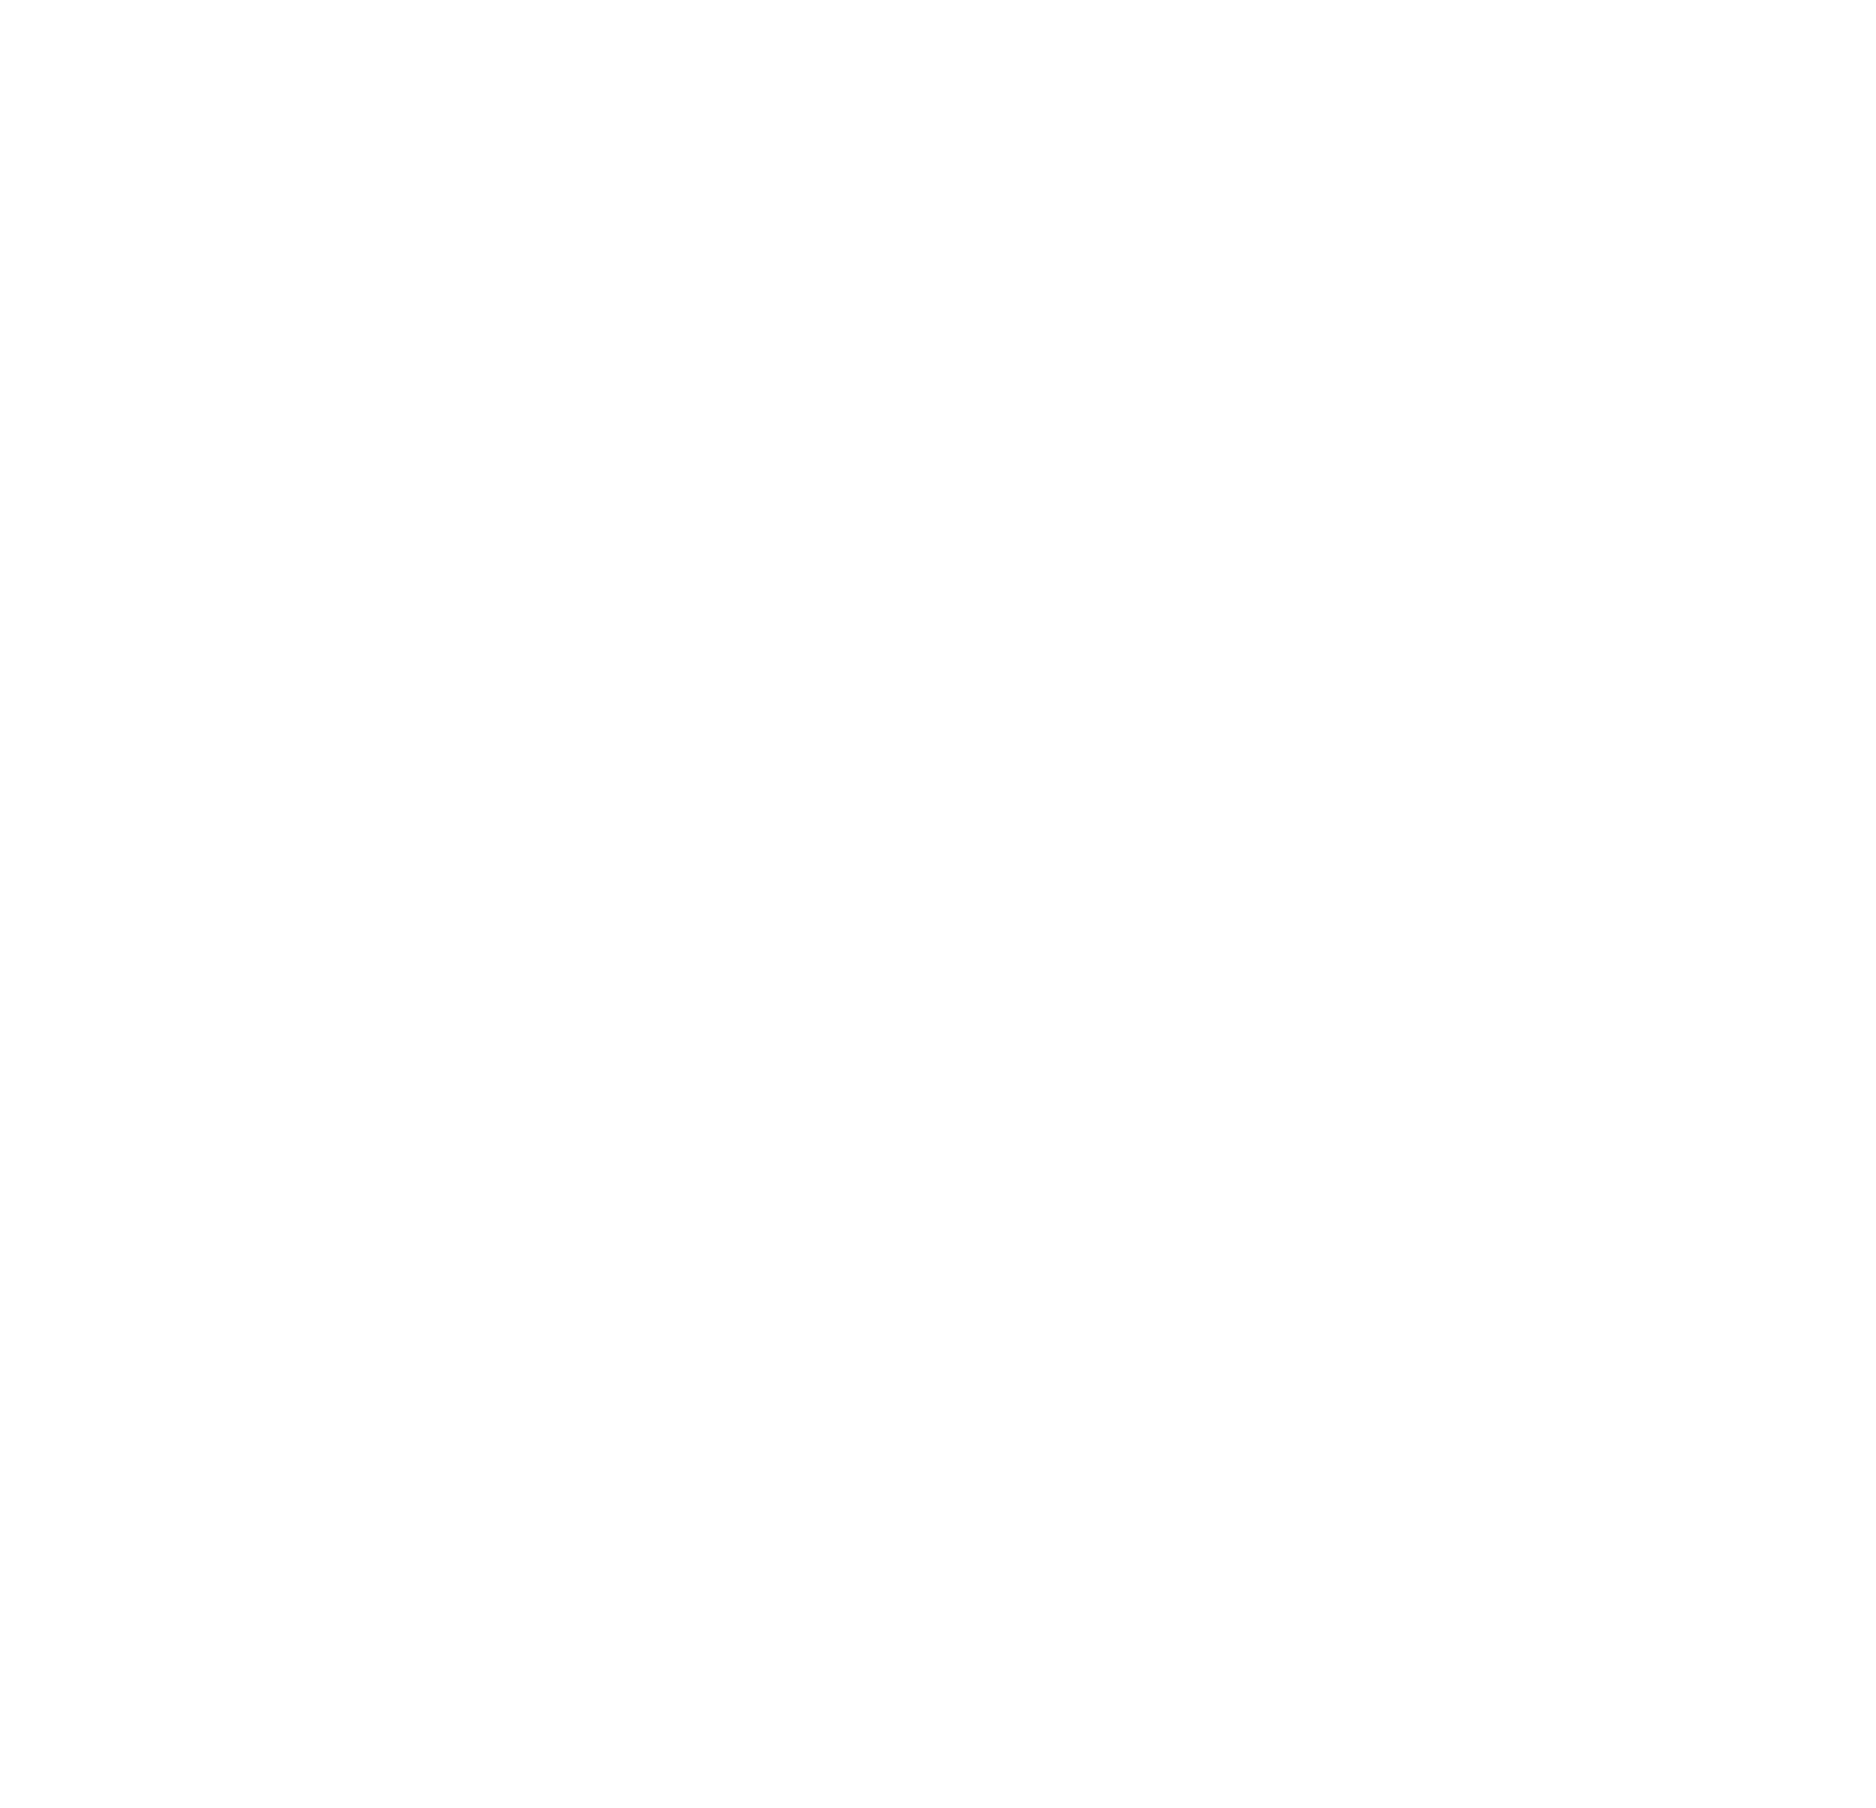

In [4]:
#---------------------------------------------------------------------
#Graficamos ambos grafos para cada cancion
outfolder ='C:/Users/Lucio/Desktop/FACULTAD/Redes/datos/datosTPE/'
N=len(archivos)
for i in range(0,1):
    plt.figure(figsize=(16,16))
    plt.suptitle(archivos[i]+'_M',fontsize=20)
    fig=graficar(grafos_m[i],color_map='rainbow',layout='espiral')
    fig = plt.gcf()
    plt.axis('off')
    fig.savefig(outfolder+archivos[i]+'_grafico_M.png')
    plt.show()
    #plt.close()
    
    #plt.figure(figsize=(16,16))
    #plt.suptitle(archivos[i]+'_R',fontsize=20)
    #fig=graficar(grafos_r[i],color_map='rainbow',layout='espiral')
    #fig = plt.gcf()
    #fig.savefig(outfolder+archivos[i]+'_grafico_R.png')
    #plt.show()
    #plt.close()


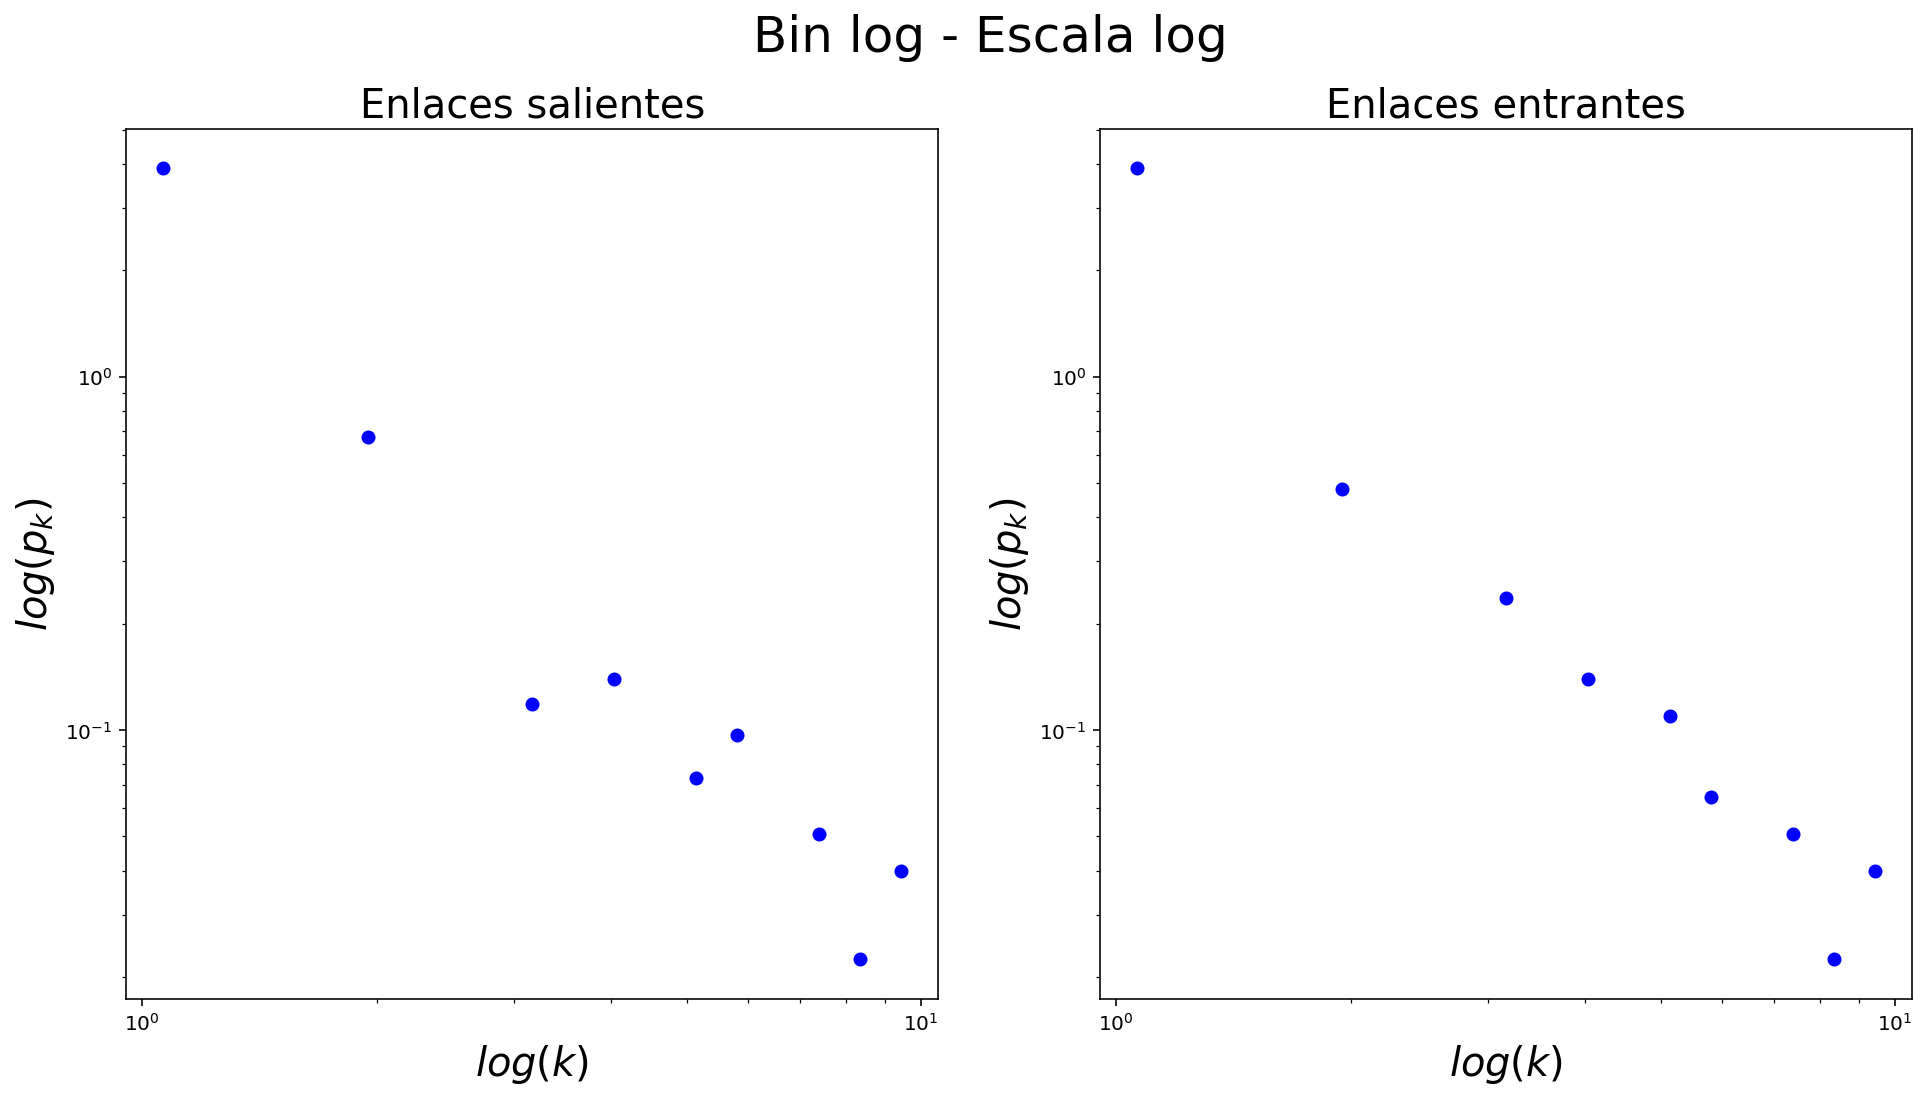

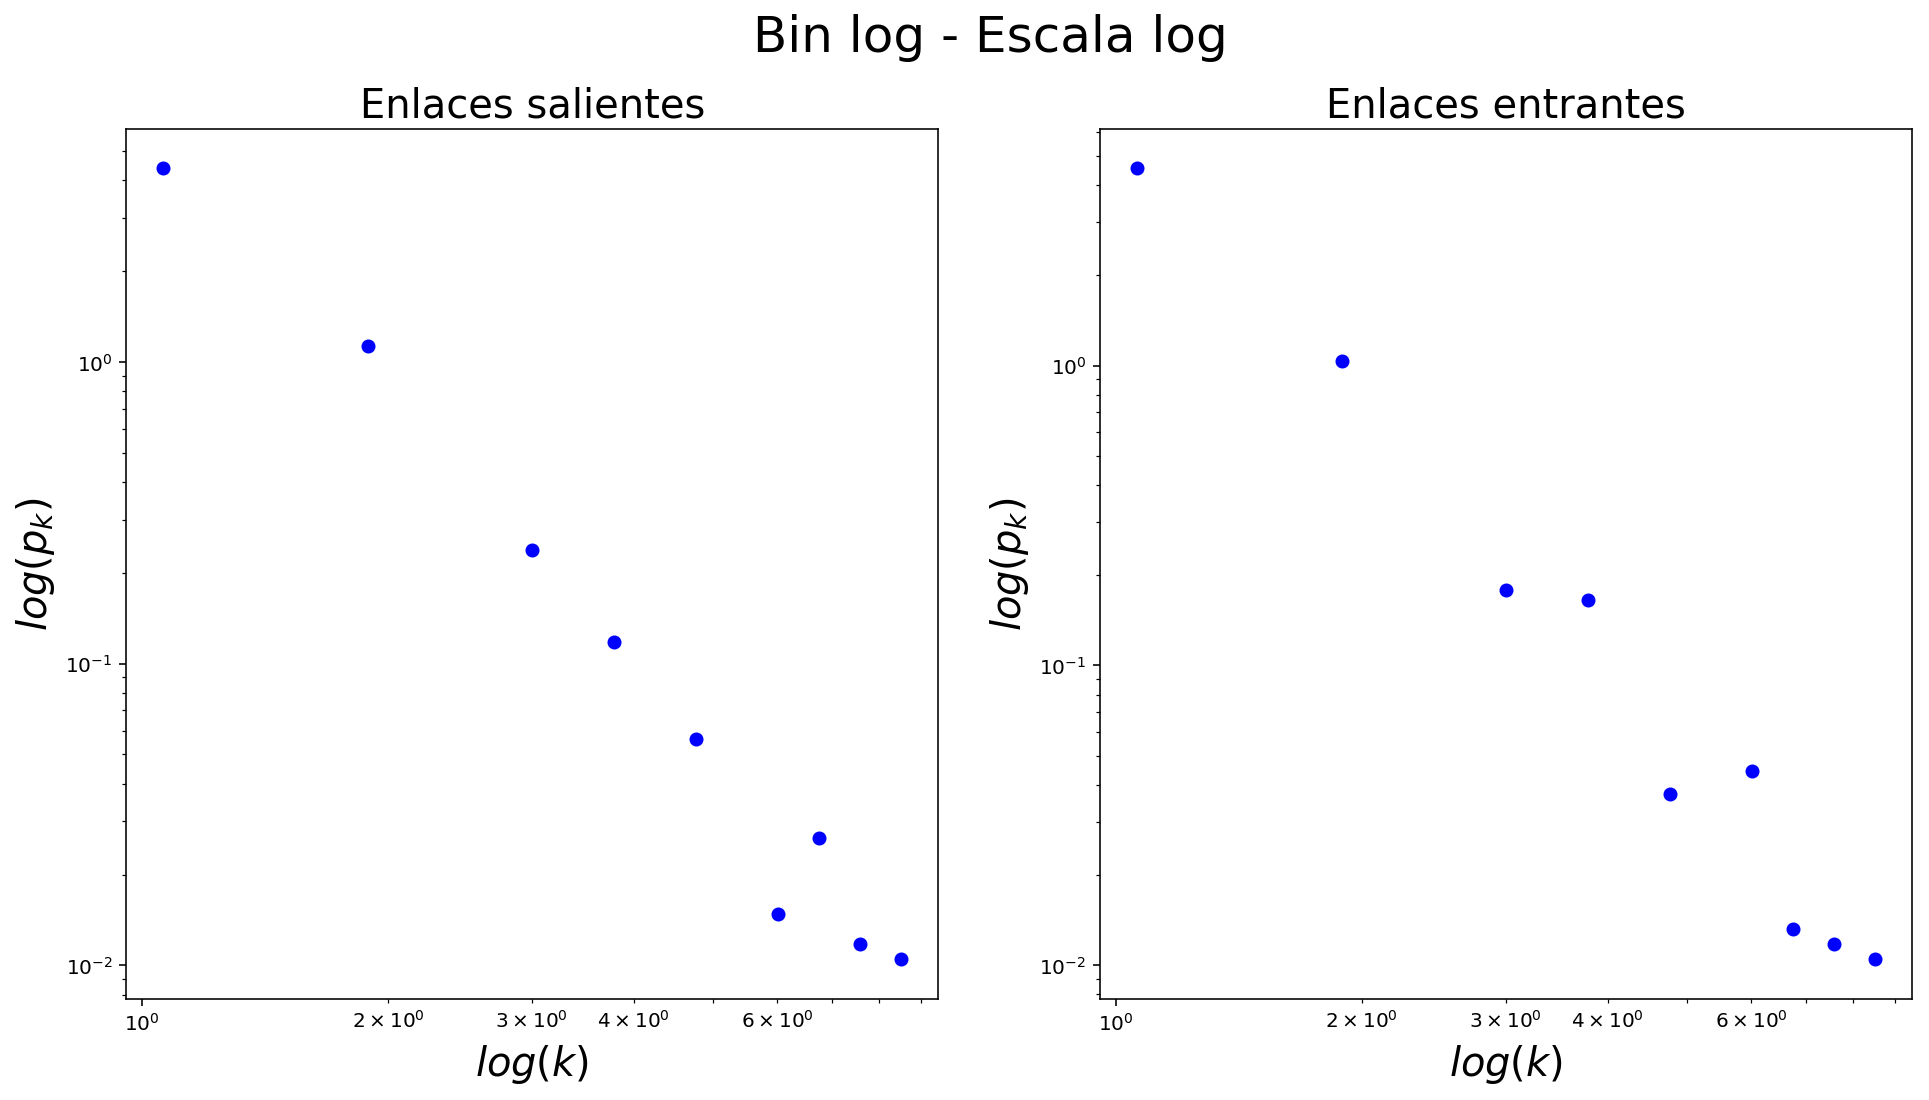

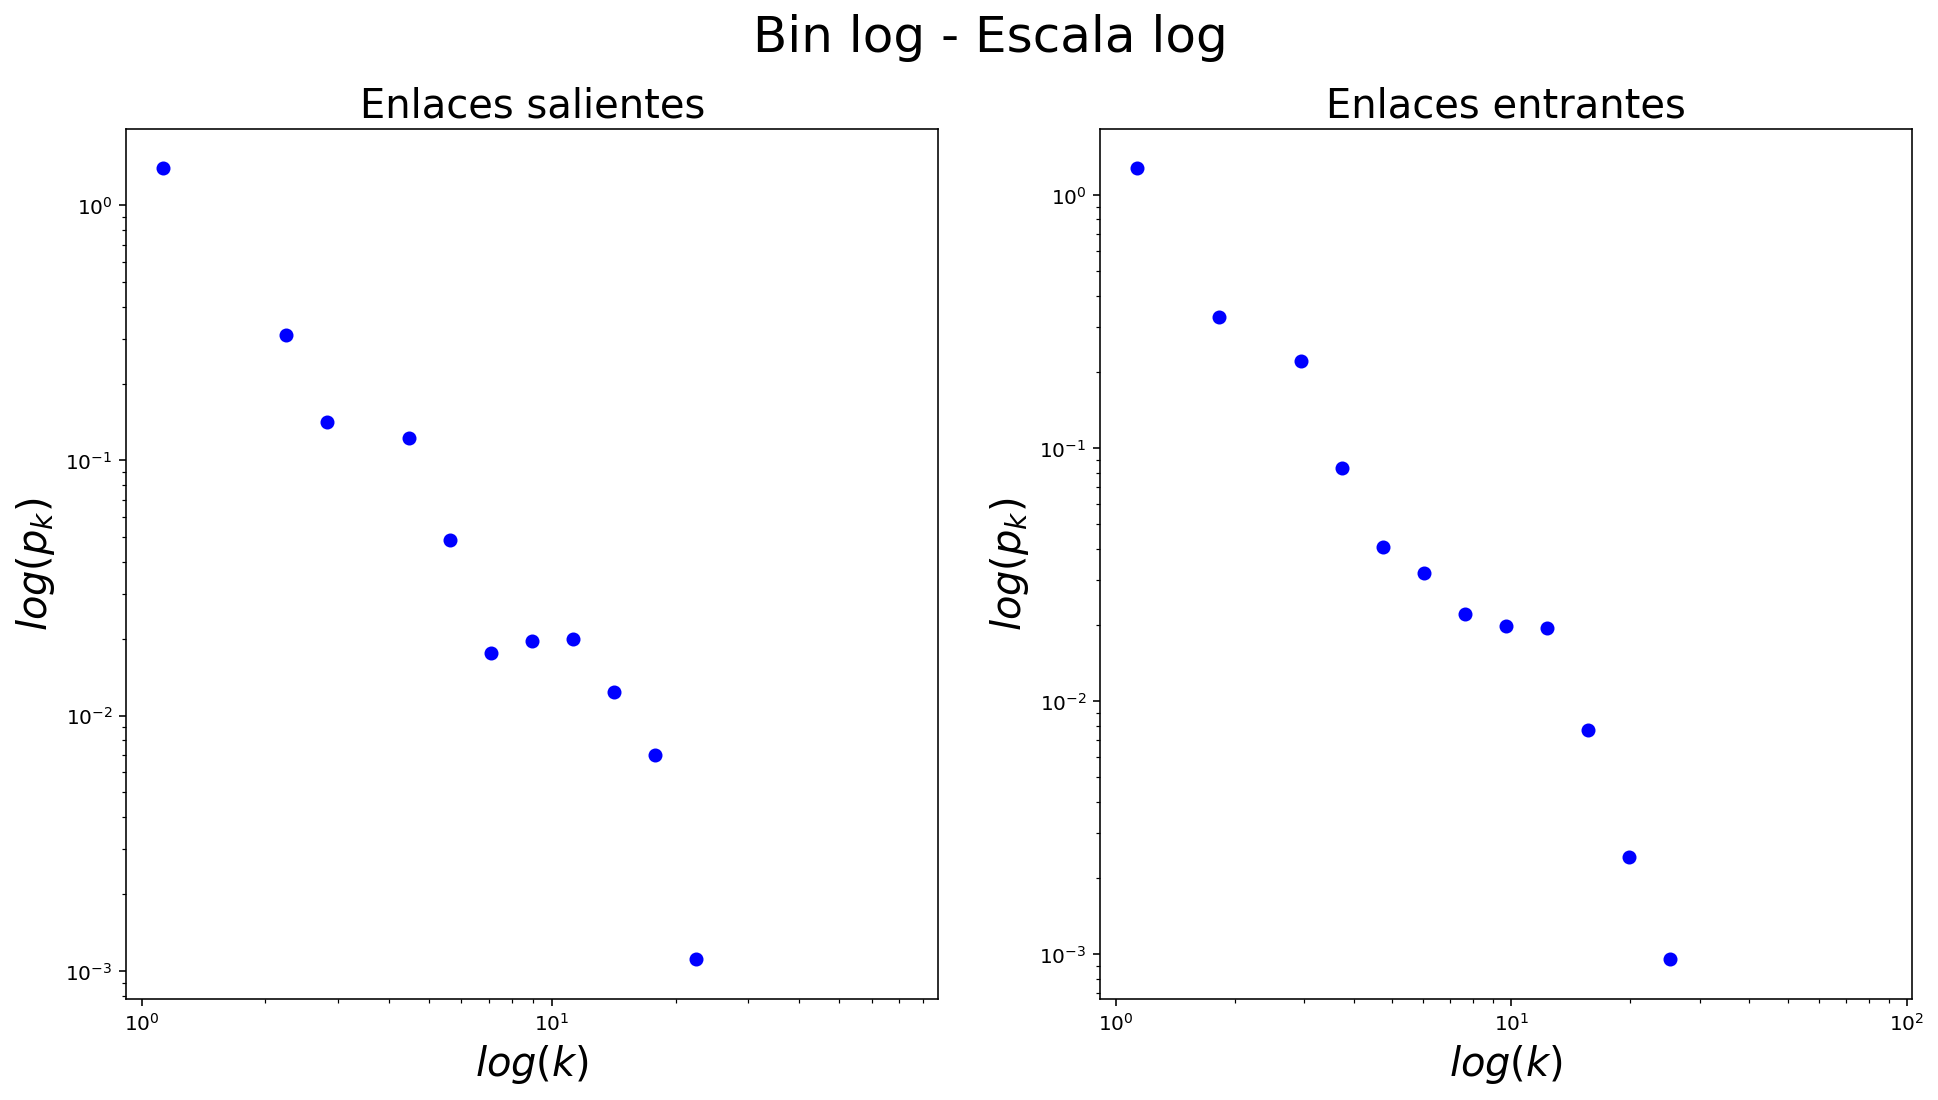

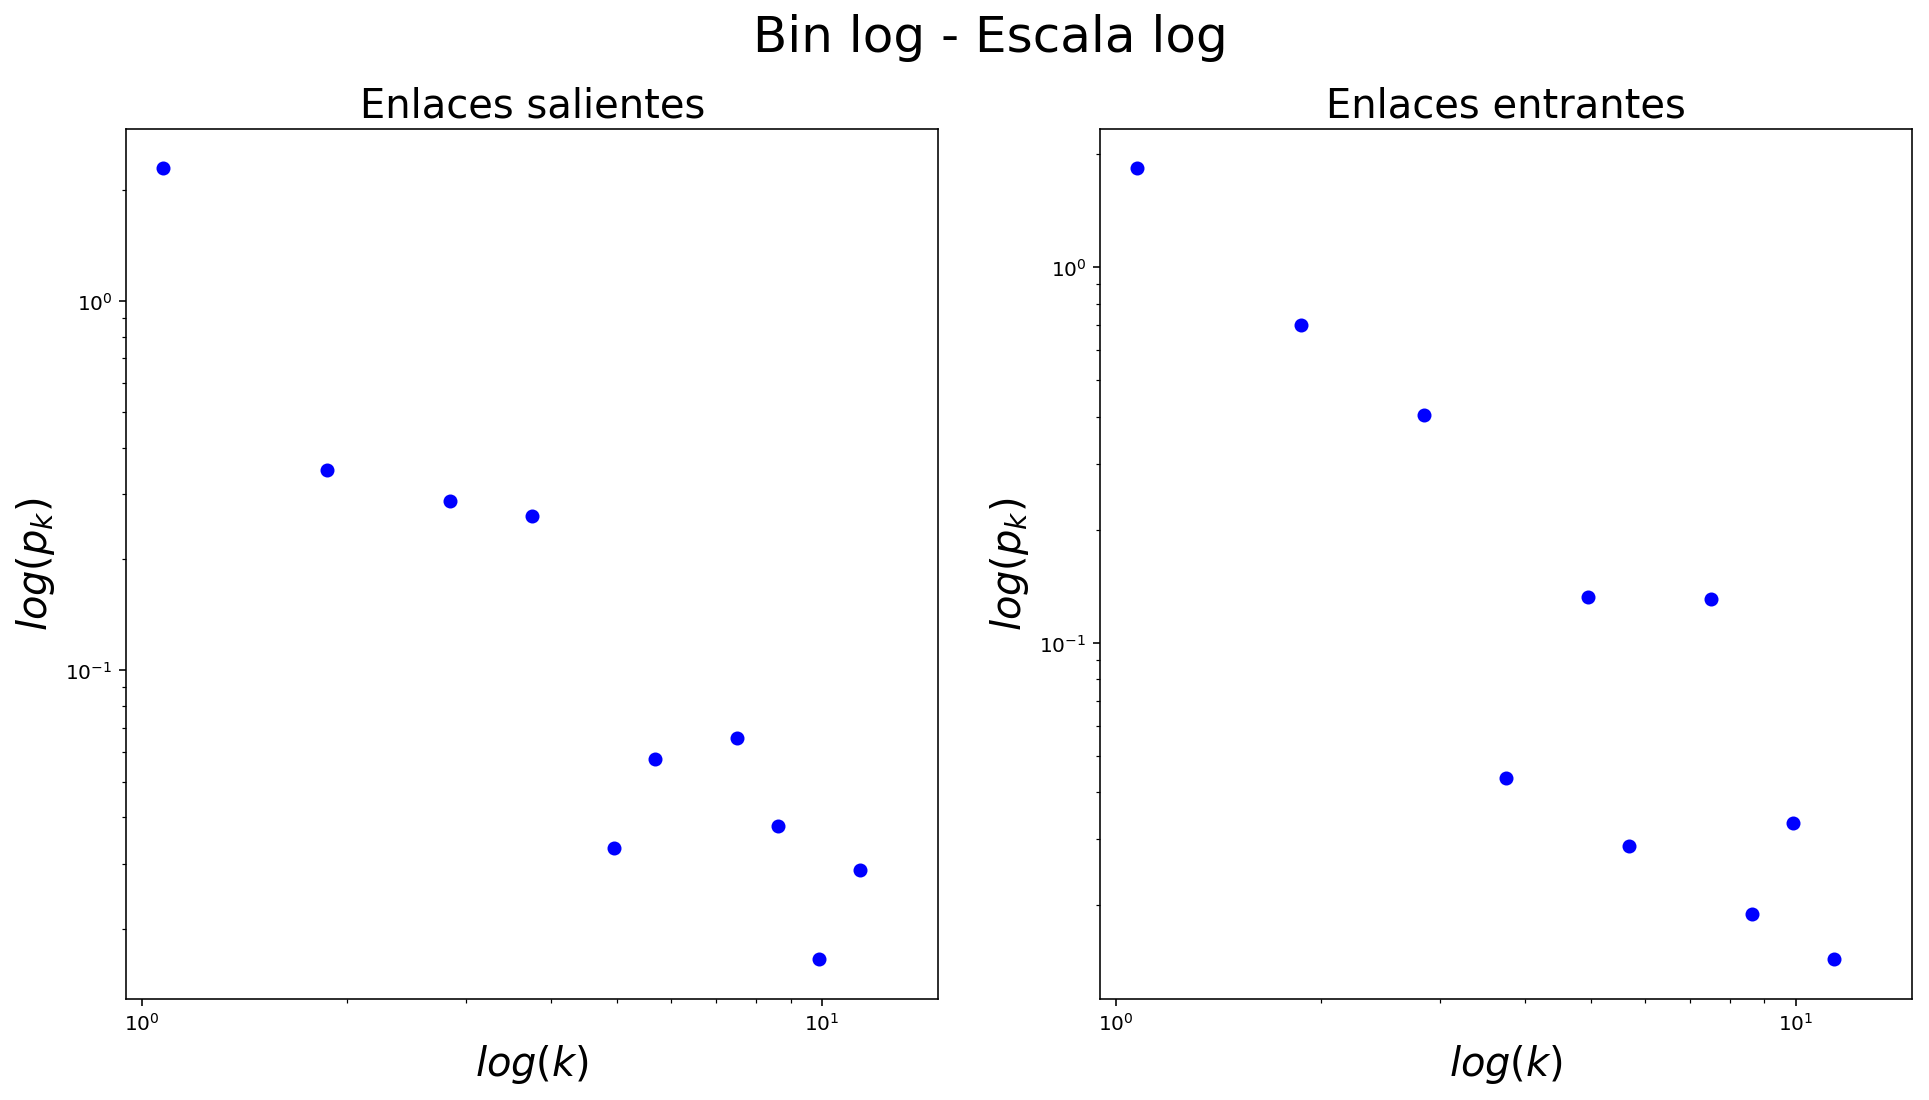

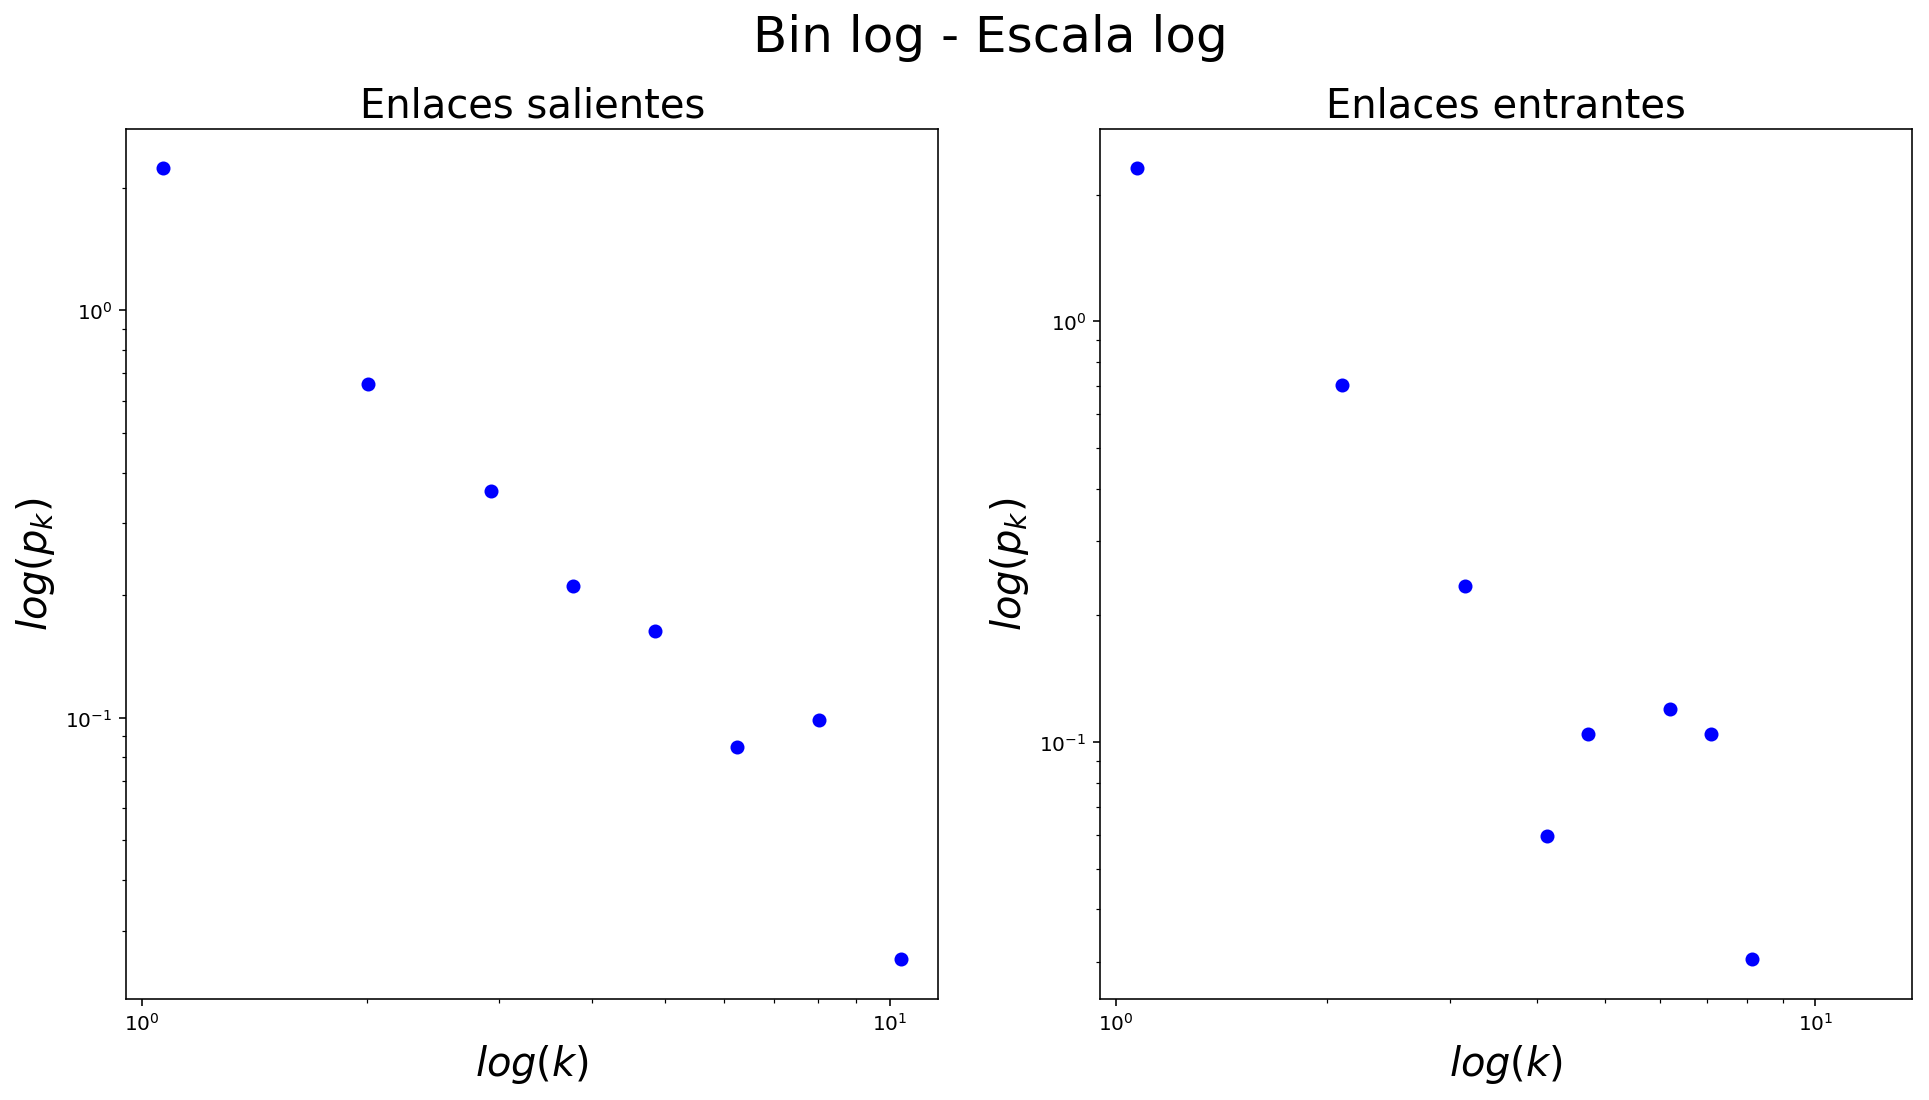

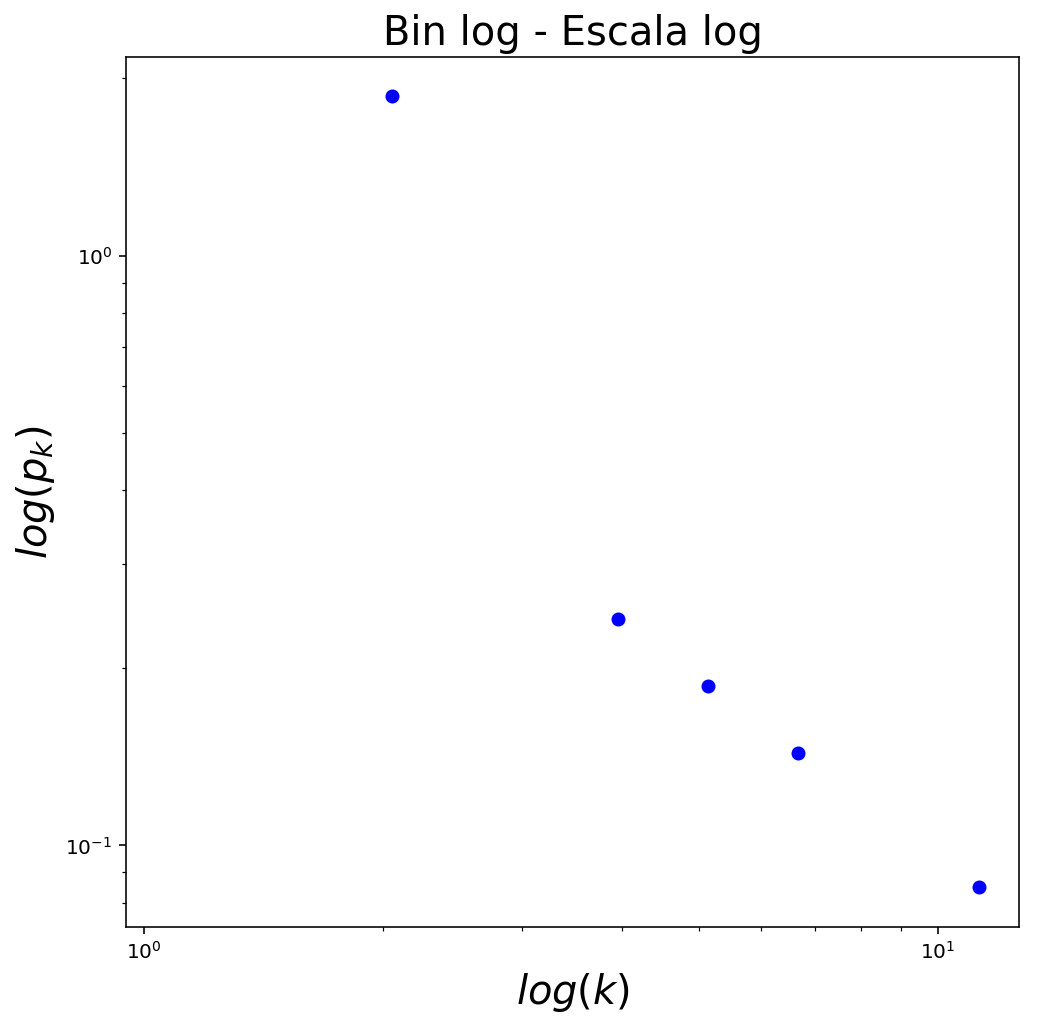

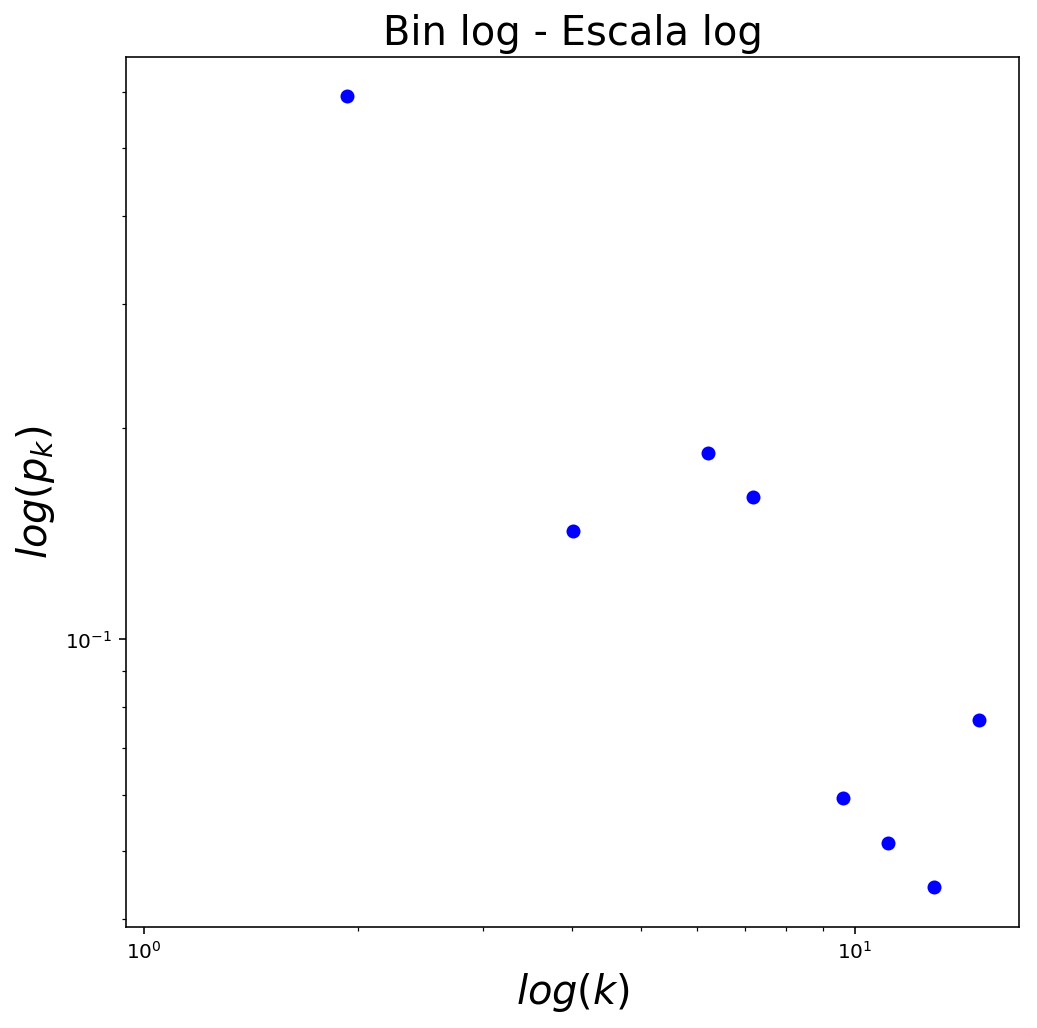

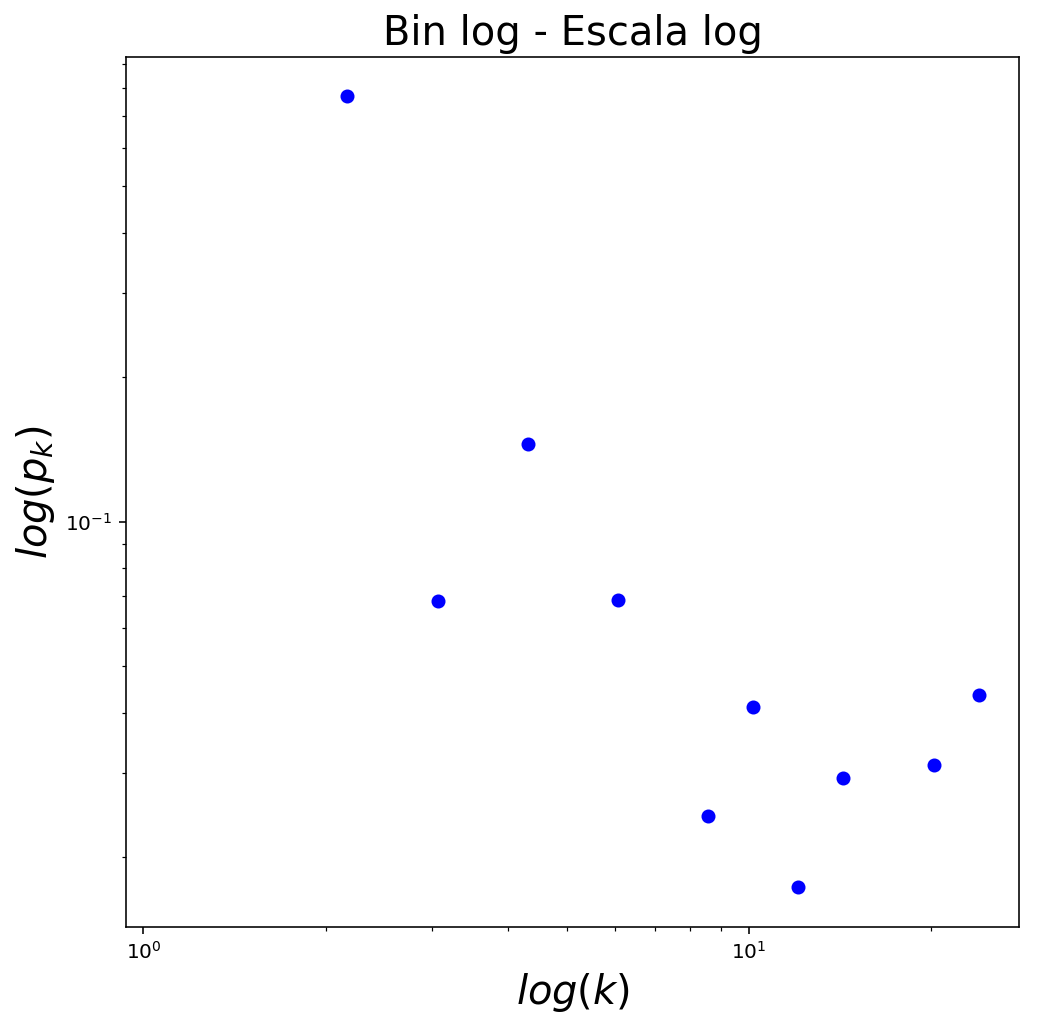

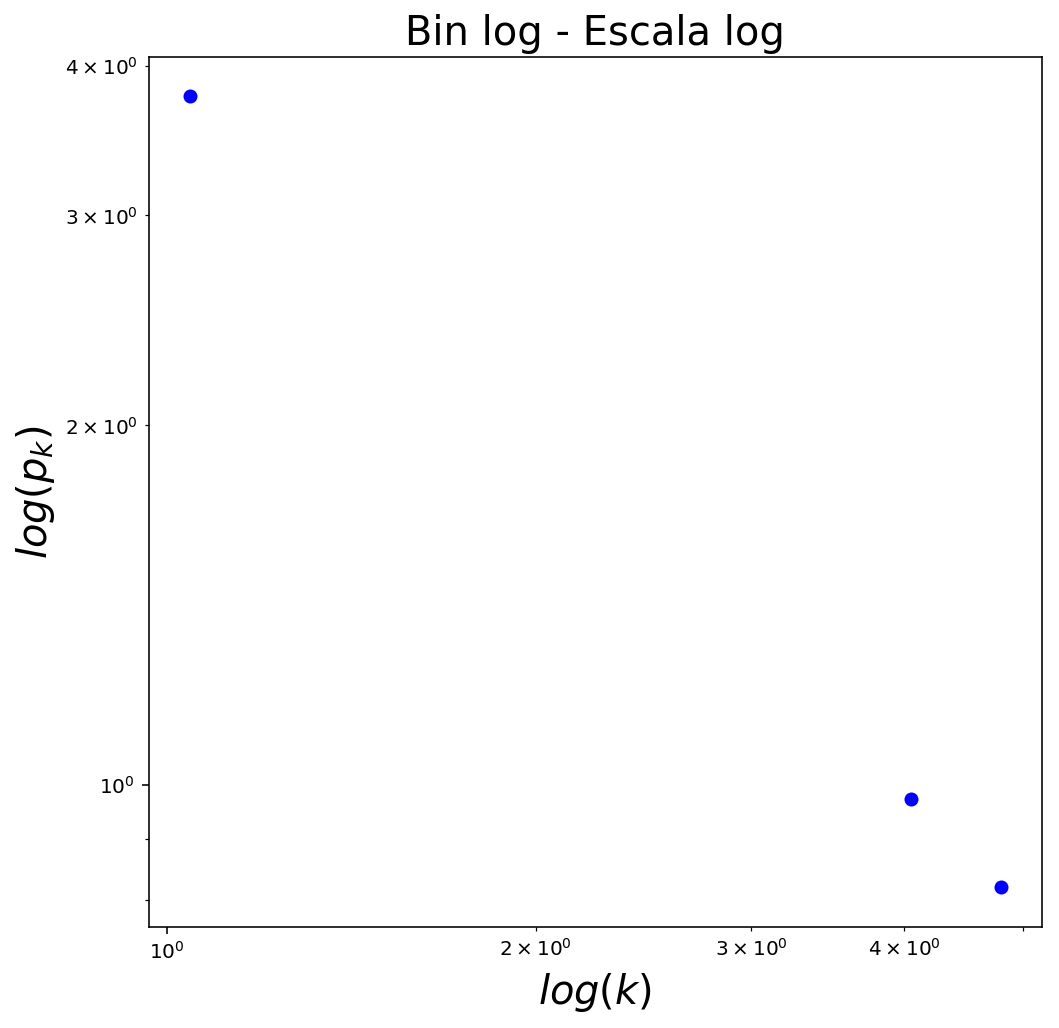

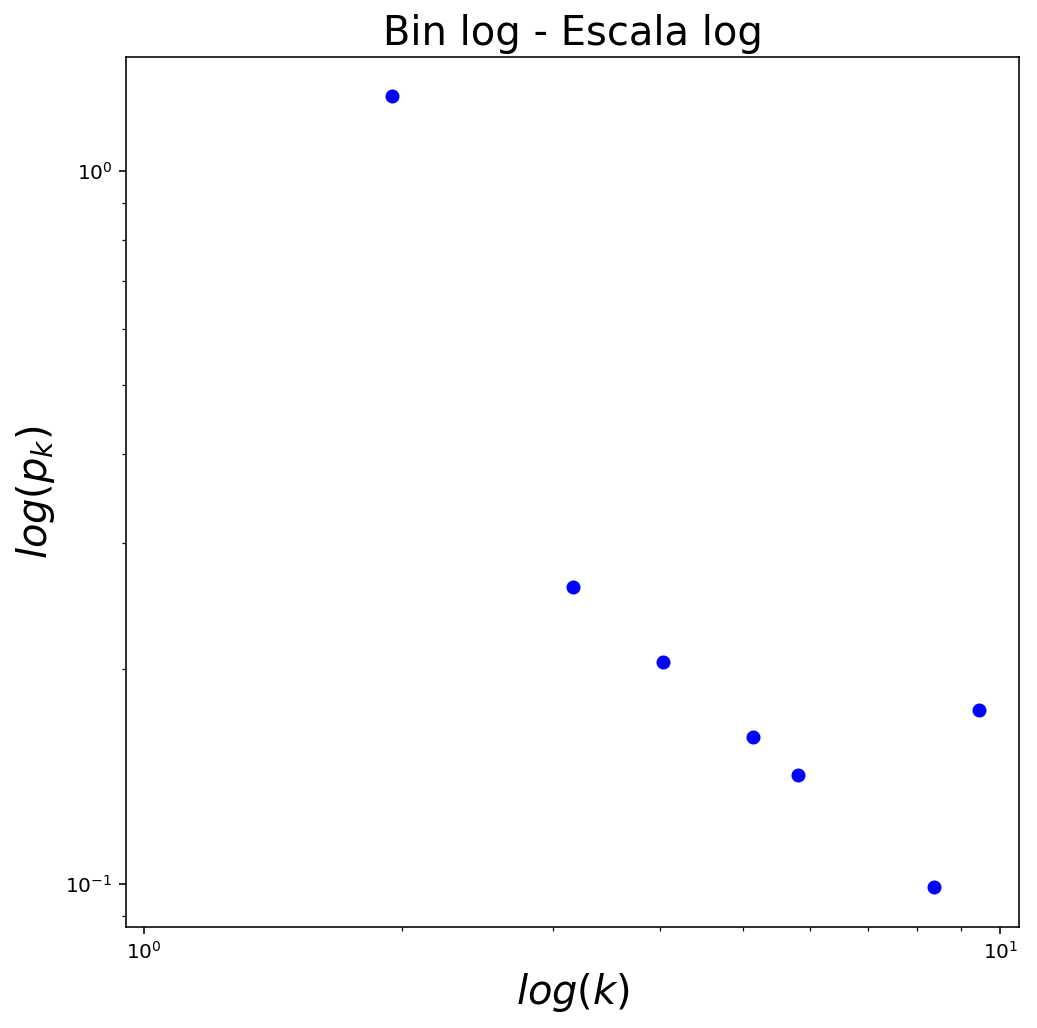

In [4]:
#---------------------------------------------------------------------
#Graficamos sus distribuciones de grados y creamos una tabla (son 2 por cada cancion en melodia y 1 por rítmica)
#Para tener una muestra se recomienda usar a Bach (grafos_m[2]) y mozart (grafos_m[0])

for i in range(0,N):
    fig=f_grado_dist_M(grafos_m[i])
    fig.savefig(outfolder+archivos[i]+'_distrib_M.png')
    plt.show()
    output=f_tabla(grafos_m[i],archivos[i])
    output
    #df= pd.DataFrame()
    #df['Date'] = output.keys()
    #df['DateValue'] = output.values()
    #df.to_csv(outfolder+ archivos[i]+'_data_M.txt',sep='\t')
    
for i in range(0,N):
    fig=f_grado_dist_H(grafos_r[i])
    fig.savefig(outfolder+archivos[i]+'_distrib_R.png')
    plt.show()
    output=f_tabla(grafos_r[i],archivos[i])
    output
    #df= pd.DataFrame()
    #df['Date'] = output.keys()
    #df['DateValue'] = output.values()
    #df.to_csv(outfolder+ archivos[i]+'_data_R.txt',sep='\t')